In [85]:
import numpy as np

In [152]:

N = 5
L = 100
rho = 0.1
N = int(np.ceil(rho*L))

T0 = 10*L
V_max = 5

velocity = np.zeros(N)
location = np.zeros(N)
site = np.zeros(L)-1

def car_initialization(N, L):

    for n in range(N):
        ind = np.random.multinomial(1, [1/L]*L)
        loc = np.where(ind==1)[0][0]
        while (site[ind>0] != -1):
            ind = np.random.multinomial(1, [1/L]*L)
            loc = np.where(ind==1)[0][0]
        site[ind>0] += 1
        location[n] = loc

def acceleration():

    for n in range(N):

        loc = int(location[n])
        from_start = next((i for i, x in enumerate(site) if x!=-1), L+1)
        if ( velocity[n]<V_max and next((i for i, x in enumerate(site[((loc+1)%L):]) if x!=-1), L-loc-1+from_start) > velocity[n]+1):
            velocity[n] +=1


def slowing_down():

    for n in range(N):
        loc = int(location[n])
        from_start = next((i for i, x in enumerate(site) if x!=-1), L+1)
        nxt = next((i for i, x in enumerate(site[((loc+1)%L):]) if x!=-1), L-loc-1+from_start) +1
        if (nxt<=velocity[n]):
            velocity[n] = nxt-1

def randomization(p):

    for n in range(N):
        if np.random.rand()<p and velocity[n] >0:
            velocity[n] -= 1


def car_motion():

    for n in range(N):
        location[n] = (velocity[n]+location[n]) % L


    for n in range(N):
        site[int(location[n])] = velocity[n]

def simulate_one_move(p):
    acceleration()
    slowing_down()
    randomization(p)
    global site
    site = np.zeros(L)-1
    car_motion()

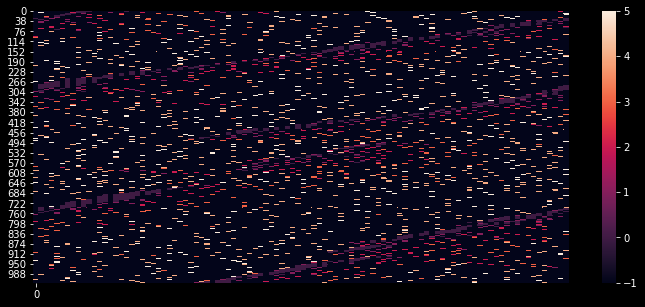

In [154]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Create data

#np.random.seed(0)
x = range(L)
car_initialization(N, L)
timeline = [site.copy()]

#print(site)
#print(location)
#print(velocity)

for i in range(10*L+20):

#	if (i%1000 == 0):
#		print(i)
	simulate_one_move(0.6)

	timeline.append(site.copy())




plt.figure(figsize=(12,5))
ax = sns.heatmap(timeline, xticklabels= 100)
plt.show()

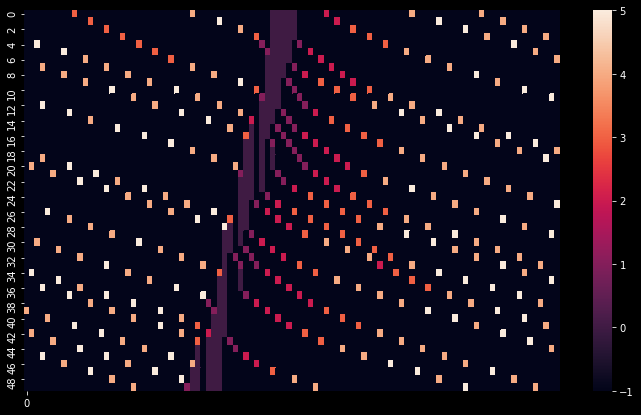

In [156]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(timeline[-50:], xticklabels= 100)
plt.show()